<a href="https://colab.research.google.com/github/MarcosVel/Deep-Learning/blob/master/CNN_CIFAR_10_IMPROVED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### IMPROVED CIFAR-10

### 1. Import librarys

In [ ]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization
print(tf.__version__)

2023-04-03 23:37:46.031731: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-03 23:37:46.086520: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 23:37:46.696929: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.0


In [ ]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-04-03 23:37:47.384800: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-03 23:37:47.409926: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-03 23:37:47.410052: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

### 2. Load data


In [ ]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 3. Normalizing

In [ ]:
# normalizing the data between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (50000, 32, 32, 3)


In [ ]:
y_train, y_test = y_train.flatten(), y_test.flatten()
print("y_train.shape:", y_train.shape)

y_train.shape: (50000,)


In [ ]:
k = len(set(y_train))
print("number of classes:", k)

number of classes: 10


### 4. Build and compile the model

The code will define a Convolutional Neural Network (CNN) model to classify images from the CIFAR-10 dataset. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The goal of the model is to take an image as input and output a probability distribution over the 10 classes.


In [ ]:
# # how can I improve my model?
# # Use data augmentation (artificially increase the size of the dataset)
# # how?  use ImageDataGenerator to create more images from the existing ones
# # 3. use a deeper model (more layers)
# # what are layers?  Conv2D, MaxPooling2D, Flatten, Dense, Dropout, etc.

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i, x)

2023-04-03 23:37:51.603358: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-03 23:37:51.603539: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-03 23:37:51.603617: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

### 5. Compile

In [ ]:
# define the optimizer with the new learning rate
opt = Adam(learning_rate=0.001)

# compile defining the loss function, optimizer, and metrics
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 6. Train the model

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10, # randomly rotate images by up to 10 degrees
    width_shift_range=0.1, # randomly shift images horizontally by up to 10%
    height_shift_range=0.1, # randomly shift images vertically by up to 10%
    horizontal_flip=True,
    shear_range=0.1, # image will be distorted along an axis, so that computers can see how humans see things from different angles
    zoom_range=0.1, # randomly zoom in by 10%
    fill_mode='nearest' # fill in missing pixels with the nearest value
  )

# prepare iterator with augmention options
train_iterator = datagen.flow(x_train, y_train, batch_size=32)

# fit the model on the batches generated by datagen.flow()
r = model.fit(train_iterator, validation_data=(x_test, y_test), steps_per_epoch=len(x_train) / 32, epochs=15)

Epoch 1/15


2023-04-03 23:38:00.687973: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-04-03 23:38:02.561216: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8801
2023-04-03 23:38:03.111301: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-03 23:38:03.780493: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-04-03 23:38:03.783215: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f619367ba70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-03 23:38:03.783231: I tensorflo

1562/1562 [==============================] - 19s 9ms/step - loss: 1.4506 - accuracy: 0.4909 - val_loss: 1.1532 - val_accuracy: 0.6057
Epoch 2/15
1562/1562 [==============================] - 13s 8ms/step - loss: 1.0360 - accuracy: 0.6384 - val_loss: 0.8857 - val_accuracy: 0.6953
Epoch 3/15
1562/1562 [==============================] - 13s 8ms/step - loss: 0.8953 - accuracy: 0.6909 - val_loss: 0.9021 - val_accuracy: 0.6967
Epoch 4/15
1562/1562 [==============================] - 13s 8ms/step - loss: 0.7975 - accuracy: 0.7268 - val_loss: 0.7916 - val_accuracy: 0.7373
Epoch 5/15
1562/1562 [==============================] - 13s 8ms/step - loss: 0.7257 - accuracy: 0.7520 - val_loss: 0.7163 - val_accuracy: 0.7590
Epoch 6/15
1562/1562 [==============================] - 13s 8ms/step - loss: 0.6821 - accuracy: 0.7668 - val_loss: 0.7123 - val_accuracy: 0.7682
Epoch 7/15
1562/1562 [==============================] - 13s 9ms/step - loss: 0.6331 - accuracy: 0.7850 - val_loss: 0.6614 - val_accuracy: 0.7

### 7. Evaluate the model

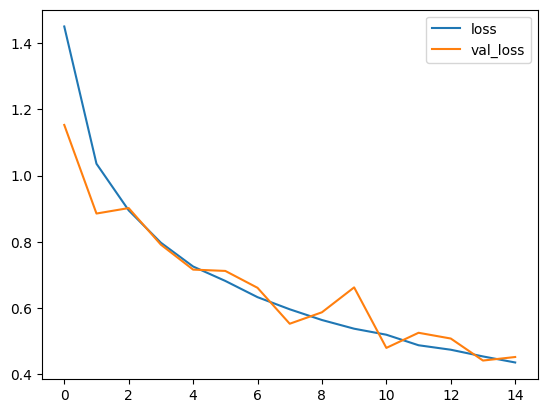

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

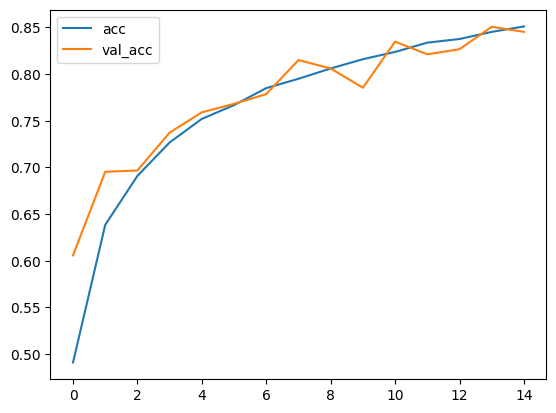

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.4523 - accuracy: 0.8453
[0.4523048400878906, 0.845300018787384]


### Labels

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

class_indices = np.unique(y_train).tolist()
class_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
class_names = [f'{labels[i]} ({class_indices[i]})' for i in range(len(class_indices))]
print(class_names)

['airplane (0)', 'automobile (1)', 'bird (2)', 'cat (3)', 'deer (4)', 'dog (5)', 'frog (6)', 'horse (7)', 'ship (8)', 'truck (9)']


### Confusion matrix

In [ ]:
# predict the test data
p_test = model.predict(x_test).argmax(axis=1)

# confusion matrix
cm = confusion_matrix(y_test, p_test)
print(cm)

313/313 [==============================] - 0s 1ms/step
[[890   8  34   7   8   0   6   6  23  18]
 [  9 936   1   0   0   0   8   2  11  33]
 [ 50   2 833  13  20   8  53  15   3   3]
 [ 18   6  85 649  31  57  94  42   5  13]
 [  7   0  76  14 810   3  60  23   4   3]
 [  8   1  65 120  22 662  45  72   1   4]
 [  7   0  24   9   4   2 945   6   1   2]
 [  8   0  21  13  21   9   7 914   1   6]
 [ 42  21  12   1   1   0   5   3 902  13]
 [ 18  48   2   3   0   0   4   2  11 912]]


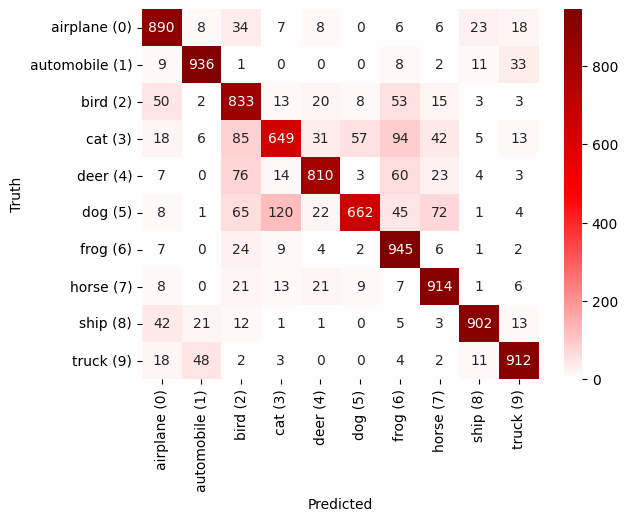

In [ ]:
# plot the confusion matrix with seaborn
# plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='seismic', center=0, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

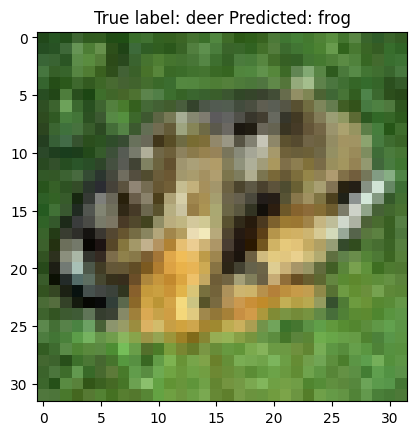

In [ ]:
# show some misclassidied examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));